In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# URL da página
url = "https://pt.wikipedia.org/wiki/Reciclagem"

# Fazendo a requisição para obter o conteúdo da página
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    # Criando o objeto BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extraindo todo o texto dos parágrafos da página
    paragraphs = soup.find_all('p')
    content = ''
    
    for p in paragraphs:
        content += p.get_text()
    
    # Salvando o conteúdo extraído em um arquivo .txt
    with open('conteudo_reciclagem.txt', 'w', encoding='utf-8') as file:
        file.write(content)
    
    print("Conteúdo extraído e salvo em 'conteudo_reciclagem.txt'")
else:
    print(f"Erro ao acessar a página. Status code: {response.status_code}")

Conteúdo extraído e salvo em 'conteudo_reciclagem.txt'


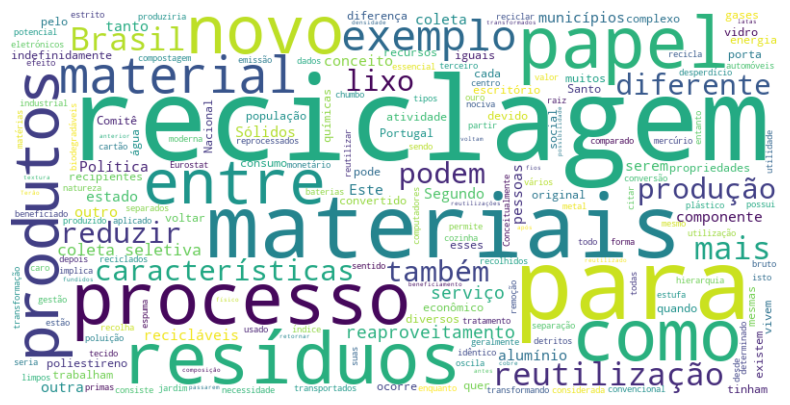

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Lendo o conteúdo do arquivo .txt
with open('conteudo_reciclagem.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Gerando a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      max_words=200, colormap='viridis', 
                      stopwords=None, regexp=r'\b\w{4,}\b').generate(text)

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()